# **データマイニングと情報可視化: 演習**
# **Data mining and information visualization: Exercise**
<font size="4">
第7回　2024年1月30日(火)<br>
データマイニング手法3-2：回帰分析（データ解析と可視化）<br>
Method 3-2: Regression (Analyze data &amp; visualization)<br>
</font>

* [レポート / Assignment](Rep_Week7.ipynb) : <span style="color: red;font-weight:bold" >レポート: 締め切り 2024年2月2日(金)　23:59 JST</span>
* [冬学期授業アンケート](https://moodle.s.kyushu-u.ac.jp/mod/claque/response.php?id=1031733&cid=67159): 締め切り 2024年2月10日(火)

### 講義動画
* [解説動画](https://youtu.be/wRK09QM8kso)

In [360]:
# まずはライブラリをインポート / Import the libraries.
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化ライブラリ / Visualization libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ / Machine learning library
import sklearn

# 小数第3位まで表示 / display up to the 3rd decimal place
%precision 3

'%.3f'

In [361]:
# ロジスティック回帰分析に必要なパッケージ
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## タイタニック号の乗客の生死をロジステック回帰で予測する
Predict the life and death of the passengers of Titanic with Logistic regression.

[Titanic with Leonard DiCaprio and Kate Winslet](https://www.imdb.com/title/tt0120338/) @Internet Movie Database

### CSVファイル（w7_titanic.csv）からデータを読み込む
0列目をインデックスとして読み込んでください。

In [362]:
# 0列目をインデックスに指定する

df = pd.read_csv('data/w7_titanic.csv', index_col=0)

## データを取得 / Load a dataset
重複したデータが多いので、ちょっと扱いにくいですが、Seaborn のdatasetを読み込んでも構いません。<br>
[Logistic Regression with Python using Titanic data](https://datascienceplus.com/logistic-regression-with-python-using-titanic-data/)

In [363]:
dataset = sns.load_dataset("titanic")
type(dataset)

pandas.core.frame.DataFrame

## データの中身を確認 / Check the contents of the dataset
**目的変数 / Objective variable**
* survived … 乗客の生存の安否（0:死亡,1:生存）/ The life and death of passengers (0:dead, 1:alive)

**説明変数 / Explanatory variables**
* pclass … 客室の階級 (Class of cabin)
* sex … 性別 (sex)
* age … 年齢 (age)

[Week 2: head](Ex_Week2.ipynb#head)<br>

In [364]:
df.head()

,survived,pclass,sex,age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


**目的変数 / Objective variable**
* survived … 乗客の生存の安否（0:死亡,1:生存）/ The life and death of passengers (0:dead, 1:alive)

**説明変数 / Explanatory variables**
* pclass … 客室の階級 (Class of cabin)
* sex … 性別 (sex)
* age … 年齢 (age)
* silbsp … 同乗してる兄弟、配偶者の数 (Number of accompanying family members, such as siblings and spouse)
* parch … 同乗してる親、子供の数 (Number of accompanying family members, such as parents and children)
* fare … 料金 (fare)
* embarked … 乗船した港 (embarked port)
* class … 客室の階級 (class of cabin)
* who … 性別 (age)
* adult_male … 大人と子供の区別 (adult or not)
* deck … 当時居た場所 (the point where they are on the ship)
* embark_town … 乗船した町 (embarked town)
* alive … 生存の安否 (dead or alive)
* alone … 1人で乗船したか否か (board alone or not)

<a id="count"></a>

## それぞれの項目のデータ数をチェック / Check the number of data in each column.

[要素の個数をカウント](https://note.nkmk.me/python-pandas-value-counts/)

In [365]:
# df.count()
df.count()

survived    891
pclass      891
sex         891
age         714
dtype: int64

## 欠損値の確認 / Check if there is NaN.
[Week 4: isnull](Ex_Week4.ipynb#isnull)

In [366]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
dtype: int64

<a id=barchart></a>

## 性別ごとの生存者・死亡者の数をチェック / Check the number of passengers surved and dead for male and female.

* survived … 乗客の生存の安否（0:死亡,1:生存）/ The life and death of passengers (0:dead, 1:alive)

[Groupby](https://note.nkmk.me/python-pandas-groupby-statistics/)<br>
[get_group]()<br>
[Week 2: extract](Ex_Week2.ipynb#extract)<br>
[Week2: groupby](Ex_Week2.ipynb#groupby)<br>
[Week 4: barchart](Ex_Week4.ipynb#barchart)<br>

<Axes: xlabel='survived', ylabel='count'>

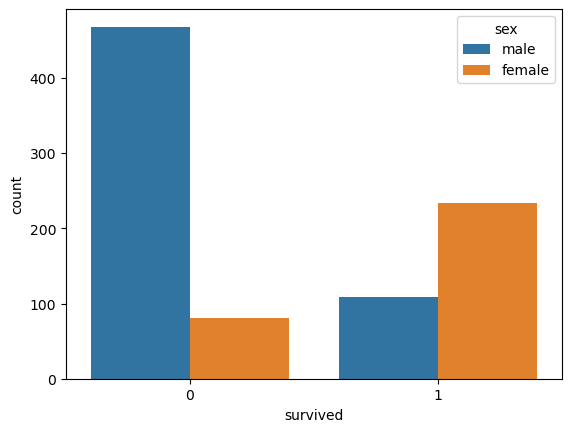

In [367]:
sns.countplot(x='survived', hue='sex', data=df)

In [368]:
# 興味のある人は、Matplotlibでプロットしたらどう書けるか、試してみてください。



## 客室のクラスごとの生存者・死亡者の数をチェック / Check the number of passengers survived and dead in each class of the cabins.

<Axes: xlabel='survived', ylabel='count'>

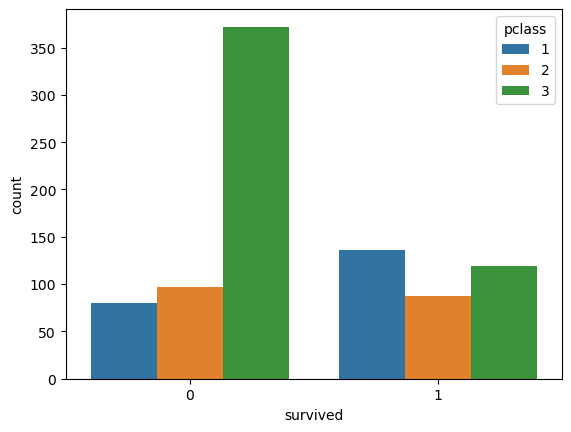

In [369]:
sns.countplot(x='survived', hue='pclass', data=df)

<a id=boxplot></a>

## 客室のクラスごとの年齢分布を箱ひげ図でプロット

<Axes: xlabel='pclass', ylabel='age'>

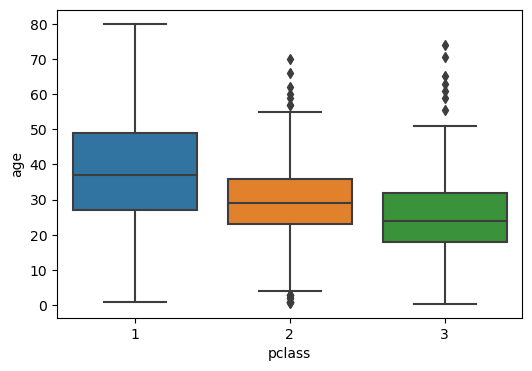

In [370]:
plt.figure(figsize=(6,4))
sns.boxplot(x='pclass',y='age',data=df)

## 年齢の欠損値を、該当する客室クラスの平均年齢で補完する
Replace NaN in age column with the average age of each class of the cabins.

[参考サイト：apply](https://note.nkmk.me/python-pandas-map-applymap-apply/)<br>
[Week4: replace_ave](Ex_Week4.ipynb#replace_ave)

In [371]:
# ここで、年齢の欠損値を、各客室の年齢の平均値で埋めてみましょう。

df['age'].fillna(df.groupby('pclass')['age'].transform('mean'), inplace=True)

## 欠損値がなくなったのを確認 / Check if there is any NaN
[Week 4: isnull](Ex_Week4.ipynb#isnull)

In [372]:
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
dtype: int64

<a id="standardization"></a>

## データを標準化 / Standardize the data

連続値の Ageを標準化（平均 0・分散 1）し、新しい列（Age_scale）に保存してください。<br>
datasetを別の名前のDataFrameにコピーして、標準化したデータの列を加えてください。<br>
Standardize the continuous values Age and Fare (mean 0, variance 1) and save them in a new column (Age_scale, Fare_scale).<Br>
Copy the dataset to a DataFrame with a different name, and add a column of standardized data. <br>

[Week 4: standardization](Ex_Week4.ipynb#standardization)

In [373]:
from sklearn.preprocessing import StandardScaler
# 平均と標準偏差で自分で標準化しても構いません。

# ## データを標準化
# ## 連続値の Age を標準化（平均 0・分散 1）し、新しい列（Age_scale）に保存します。

scaler = StandardScaler()
scaler.fit(df[['age']])
df['Age_scale'] = scaler.transform(df[['age']])
df.head()

,survived,pclass,sex,age,Age_scale
0,0,3,male,22.0,-0.552360
1,1,1,female,38.0,0.659475
2,1,3,female,26.0,-0.249401
3,1,1,female,35.0,0.432256
4,0,3,male,35.0,0.432256


<a id="convert_str"></a>

## 文字列のデータを数字に変換 / Convert the string type data into integers.

[pandasでカテゴリ変数をダミー変数に変換: get_dummies](https://note.nkmk.me/python-pandas-get-dummies/)

In [374]:
sex = pd.get_dummies(df["sex"])
sex.head()

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


## female と male の列、どちらか一つあればいいので、female の列を削除

One of the columns, female and male, is enough to find the sex of the passenger, so remove the column, female.

引数drop_first=Trueとすると、最初のカテゴリーが除外されk-1個のダミー変数に変換される。<br>
If the argument drop_first=True, the first category will be excluded and converted to k-1 dummy variables.

In [375]:
# sex = pd.get_dummies(df3["sex"])
sex = pd.get_dummies(df["sex"],drop_first=True)
sex.head()

,male
0,True
1,False
2,False
3,False
4,True


## pclass の行も同様に処理 / Do the same process to the column, pclass.

In [376]:
pclass = pd.get_dummies(df["pclass"],drop_first=True)

# 列名が数字だと後で警告が出るので、変えておきます。
pclass = pclass.rename(columns={2: 'Second', 3: 'Third'})
pclass.head()

,Second,Third
0,False,True
1,False,False
2,False,True
3,False,False
4,False,True


## 数字に変換したデータを、dataset に結合する / Merge the converted data into the DataFrame, dataset.

元のDataFrameのsurvived, 標準化した年齢(Age_scale), 数値化した性別とpclassをつなげて、新しい名前のDataFrameに格納してください。<br>

In [377]:
df2 = pd.concat([df.survived, df.Age_scale, pclass,sex],axis=1)

## 中身を確認 / Check the contents of the DataFrame

In [378]:
df2.head()

,survived,Age_scale,Second,Third,male
0,0,-0.552360,False,True,True
1,1,0.659475,False,False,False
2,1,-0.249401,False,True,False
3,1,0.432256,False,False,False
4,0,0.432256,False,True,True


<a id="crosstab"></a>

## クロス集計 / Crosstab

女性と男性の死亡者数と生存者数をクロス集計してください。<br>
Cross tabulate the number of deaths and number of survivors for females and males.<br>
<br>
[参考サイト：クロス集計表 @ note.nkmk.me](https://note.nkmk.me/python-pandas-crosstab/)<br>
[参考サイト：クロス集計表 @ 統計WEB](https://bellcurve.jp/statistics/course/5414.html)

In [379]:
# 0:dead, 1:alive
# sex = 0: female, 1: male

sex_ct = pd.crosstab(df2['male'], df2['survived'])
sex_ct.index = ["Female", "Male"]
sex_ct.columns = ["Dead", "Alive"]
sex_ct


,Dead,Alive
Female,81,233
Male,468,109


<a id="obj_series"></a>

## データを説明変数と目的変数に分割

DataFrame `dataset` の中に、目的変数（survived）と説明変数（survived 以外）が含まれている。<br>
解析するときには、目的変数と説明変数を分けておく必要があるので、ここで分けます。<br>
<br>
A DataFrame, `dataset` includes both the objective variable (survived) and the explanatory variables (other than survived).<br>
When you input the variables, you need to input the objective variables and explanatory variables separately.<br>
So here we creat a Series for the objective variable and a DataFrame for the explanatory variables .

* X : 説明変数 / Explanatory variables
* Y : 目的変数 / Objective variable


In [380]:
# 説明変数：DataFrameからsurvivedを削除
X = df2.drop('survived', axis=1)

# 目的変数：DataFrameからsurvivedを抽出
Y = df2['survived']


<a id="sprit_data"></a>

## 分割したデータを訓練データと検証データ（7:3）に分割
Sprit the original data set into training data and test data (for evaluation)

[参考サイト：データ分割 @ note.nkmk.me](https://note.nkmk.me/python-sklearn-train-test-split/)<br>

In [381]:
# 分割したデータを訓練データと検証データ（7:3）に分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

## 分割後のデータ件数を確認 / Check the number of data after spritting the dataset
[Week 2: len](Ex_Week2.ipynb#shape)

In [382]:
# 訓練データの数
print(len(X_train))

# 検証データの数
print(len(X_test))



623
268


<a id="logit"></a>

## インスタンスを作成してモデリング / Create an instance and apply Logistic regression

エラーが出る時は、ソルバーのオプション(solver='liblinear')を付けてください。<br>
ソルバーを明記する必要があります。<br>
If a warning appears, please add an option, solver='liblinear'.<br>
You need to specify the solver explicitly.<br>

[参考サイト1：ロジスティック回帰](http://taustation.com/logistic-regression-cancer-oreilly2335/)<br>
[参考サイト2：ロジスティック回帰](http://ailaby.com/logistic_reg/)<br>

[How to choose a solver/solverの選び方](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)<br>
[solverについて警告が出たらこちらを参照](http://taustation.com/logistic-regression-cancer-oreilly2335/)

In [383]:
# ロジスティック回帰モデルのインスタンスを作成

logmodel = LogisticRegression()

## 結果のアウトプット / Output the result

In [384]:
# ロジスティック回帰モデルの重みを学習

logmodel.fit(X_train, Y_train)

LogisticRegression()

<a id="predict"></a>

## テスト用データを使って、乗客の生死を予測 / Predict the life and death of the passengers with test data.

[参考サイト：Classification_report](https://gotutiyan.hatenablog.com/entry/2020/09/09/111840)

In [385]:
predictions = logmodel.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))


              precision    recall  f1-score   support

           0       0.76      0.86      0.81       153
           1       0.77      0.64      0.70       115

    accuracy                           0.76       268
   macro avg       0.77      0.75      0.75       268
weighted avg       0.77      0.76      0.76       268



## 結果を表示 / Display the result

* 0: dead
* 1: alive

In [386]:
predictions
# Y_test

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0], dtype=int64)

## 混合行列 / Confusion matrix

<table>
<tr>
    <td>True Negative </td>
    <td>False Potisive</td>
</tr>
<tr>
    <td>False Negative</td>
    <td>True Positive </td>
</tr>
</table>

True positive: (We predicted a positive result and it was positive)　本当の陽性<br>
True negative: (We predicted a negative result and it was negative)　本当の陰性<br>
False positive: (We predicted a positive result and it was negative)　偽陽性<br>
False negative: (We predicted a negative result and it was positive)　偽陰性<br>

[参考サイト：混合行列 @ note.nkmk.me](https://note.nkmk.me/python-sklearn-confusion-matrix-score/)<br>
[参考サイト：混合行列](https://qiita.com/TsutomuNakamura/items/a1a6a02cb9bb0dcbb37f)

In [387]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, predictions)

array([[131,  22],
       [ 41,  74]], dtype=int64)

In [388]:
#すべてのデータの中から、正しく予測されていたデータの割合
# What percentage is that the number of data correctly predicted?
# (True Positive + True Negative)/(True Positive + True Negative + False Positive + False Negative)
(138+71)/(138+28+31+71)

0.780